In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
pip install --upgrade pip

     ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
     -- ------------------------------------- 0.1/2.1 MB 3.3 MB/s eta 0:00:01
     ----- ---------------------------------- 0.3/2.1 MB 2.9 MB/s eta 0:00:01
     --------- ------------------------------ 0.5/2.1 MB 4.2 MB/s eta 0:00:01
     ----------- ---------------------------- 0.6/2.1 MB 3.1 MB/s eta 0:00:01
     ---------------- ----------------------- 0.9/2.1 MB 3.6 MB/s eta 0:00:01
     -------------------------- ------------- 1.4/2.1 MB 4.9 MB/s eta 0:00:01
     ------------------------------- -------- 1.6/2.1 MB 5.4 MB/s eta 0:00:01
     -------------------------------- ------- 1.7/2.1 MB 4.6 MB/s eta 0:00:01
     ---------------------------------------  2.1/2.1 MB 4.9 MB/s eta 0:00:01
     ---------------------------------------- 2.1/2.1 MB 4.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1
Note: 

In [25]:
from collections import Counter
from surprise import(SVD,Reader,Dataset,KNNBasic,accuracy, KNNWithMeans)

In [11]:
movie = pd.read_csv("movies.csv")
link = pd.read_csv("links.csv")
rating = pd.read_csv("ratings.csv")
tag = pd.read_csv("tags.csv")

In [13]:
movie.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [73]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [72]:
movie.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


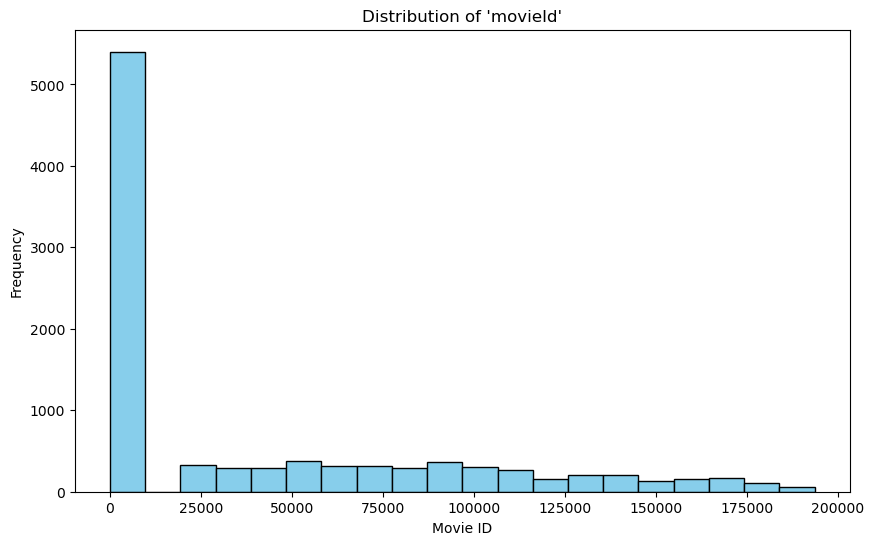

In [75]:
plt.figure(figsize=(10, 6))
plt.hist(movie['movieId'], bins=20, color='skyblue', edgecolor='black')
# 그래프 제목과 레이블 설정
plt.title("Distribution of 'movieId'")
plt.xlabel("Movie ID")
plt.ylabel("Frequency")

# 그래프 표시
plt.show()

In [16]:
movie["genres"] = movie["genres"].apply(lambda row:row.split("|"))
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [19]:
genres = Counter()
for row in movie["genres"]:
    genres.update(row)

In [21]:
genres

Counter({'Adventure': 1263,
         'Animation': 611,
         'Children': 664,
         'Comedy': 3756,
         'Fantasy': 779,
         'Romance': 1596,
         'Drama': 4361,
         'Action': 1828,
         'Crime': 1199,
         'Thriller': 1894,
         'Horror': 978,
         'Mystery': 573,
         'Sci-Fi': 980,
         'War': 382,
         'Musical': 334,
         'Documentary': 440,
         'IMAX': 158,
         'Western': 167,
         'Film-Noir': 87,
         '(no genres listed)': 34})

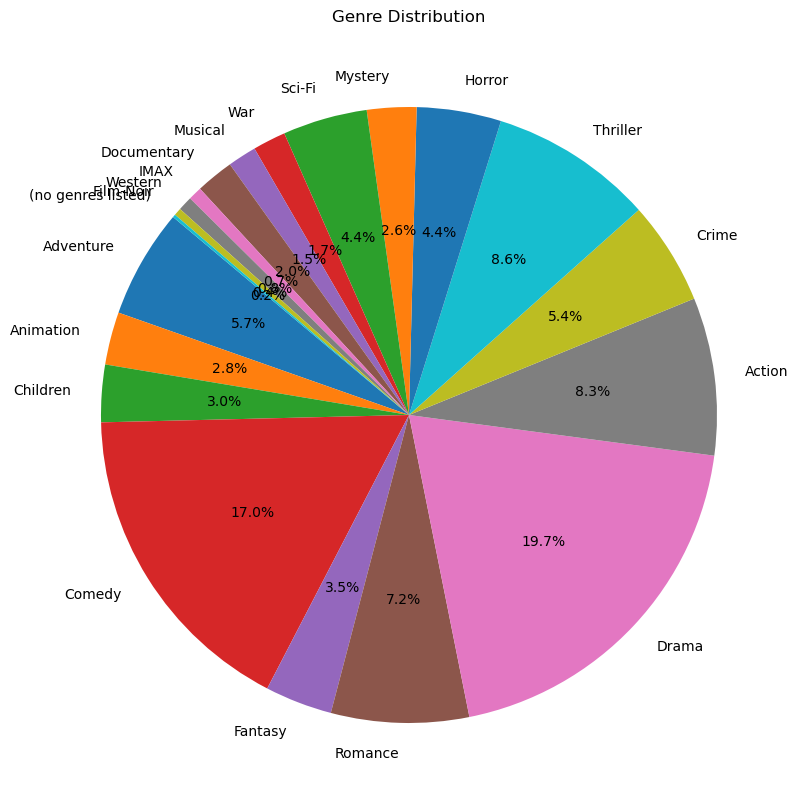

In [70]:
genre_names = list(genres.keys())
genre_counts = list(genres.values())
plt.figure(figsize=(10, 10))
plt.pie(genre_counts, labels=genre_names, autopct='%1.1f%%', startangle=140)
plt.title('Genre Distribution')
plt.show()

In [20]:
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [23]:
genre_name = []
genre_count = []
for genre, count in genres.items():
    genre_name.append(genre)
    genre_count.append(count)

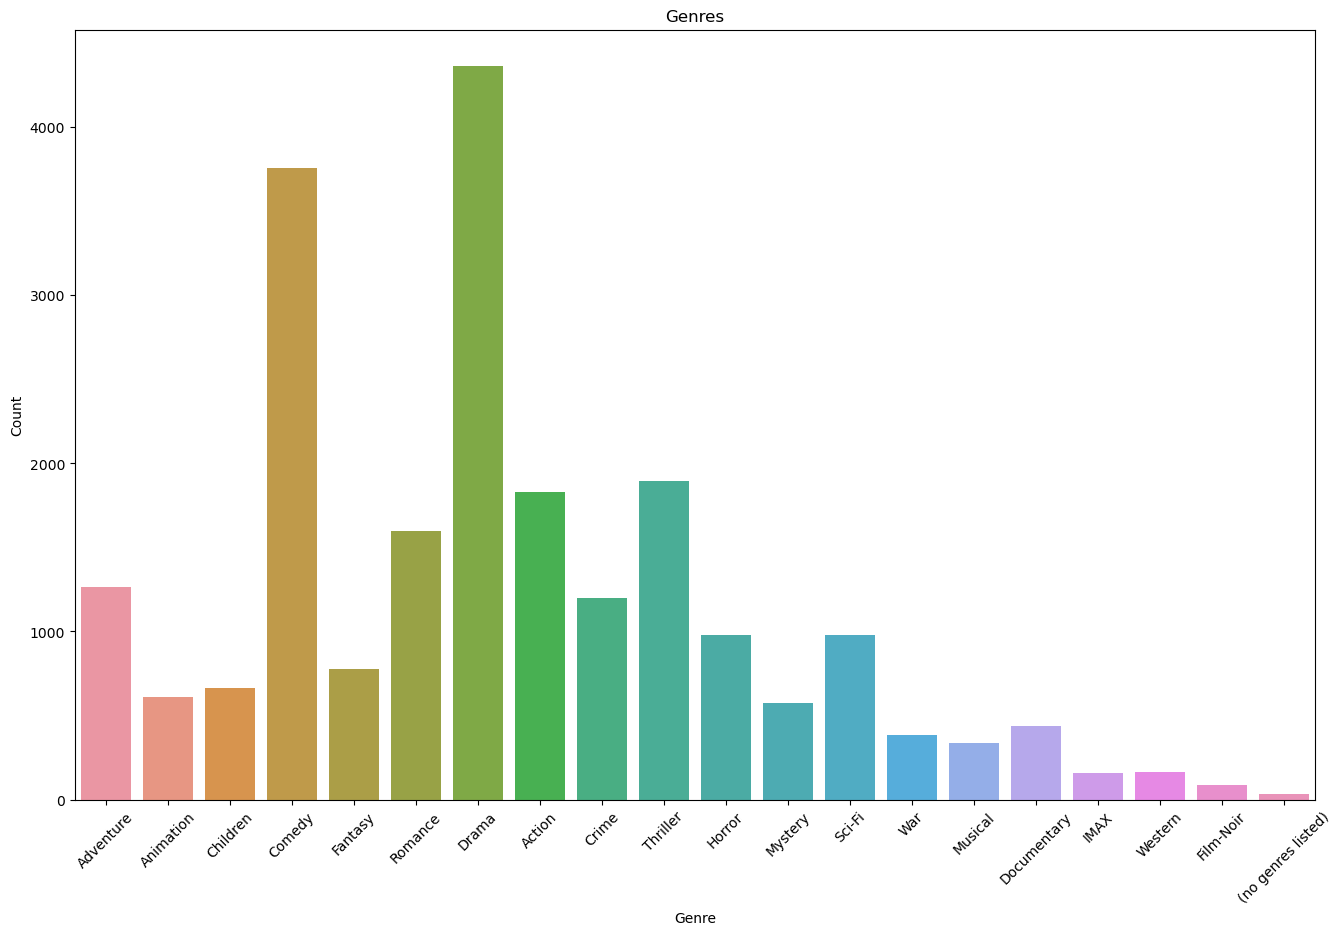

In [24]:
plt.figure(figsize=(16, 10))
sns.barplot(x=genre_name, y=genre_count)
plt.xticks(rotation=45)
plt.title("Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

In [26]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [28]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [29]:
rating.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [32]:
movies = movie.merge(rating.groupby("movieId")["rating"].agg(["count", "mean"]), on="movieId", how="left")
movies.head()

,movieId,title,genres,count,mean
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",215.0,3.920930
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",110.0,3.431818
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",52.0,3.259615
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",7.0,2.357143
4,5,Father of the Bride Part II (1995),[Comedy],49.0,3.071429


In [33]:
tag.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [34]:
tag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [37]:
tag["tag"].unique()

array(['funny', 'Highly quotable', 'will ferrell', ..., 'gun fu',
       'heroic bloodshed', 'Heroic Bloodshed'], dtype=object)

In [36]:
tag["tag"].value_counts()

In Netflix queue     131
atmospheric           36
thought-provoking     24
superhero             24
funny                 23
                    ... 
small towns            1
In Your Eyes           1
Lloyd Dobbler          1
weak plot              1
Heroic Bloodshed       1
Name: tag, Length: 1589, dtype: int64

In [39]:
movies = movies.merge(tag.groupby("movieId")["tag"].apply(list), on="movieId", how="left")
movies.head()

,movieId,title,genres,count,mean,tag
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",215.0,3.920930,"[pixar, pixar, fun]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",110.0,3.431818,"[fantasy, magic board game, Robin Williams, game]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",52.0,3.259615,"[moldy, old]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",7.0,2.357143,NaN
4,5,Father of the Bride Part II (1995),[Comedy],49.0,3.071429,"[pregnancy, remake]"


In [40]:
movies.sort_values(by="mean", ascending = False)

,movieId,title,genres,count,mean,tag
7656,88448,Paper Birds (Pájaros de papel) (2010),"[Comedy, Drama]",1.0,5.0,NaN
8107,100556,"Act of Killing, The (2012)",[Documentary],1.0,5.0,NaN
9083,143031,Jump In! (2007),"[Comedy, Drama, Romance]",1.0,5.0,NaN
9094,143511,Human (2015),[Documentary],1.0,5.0,NaN
9096,143559,L.A. Slasher (2015),"[Comedy, Crime, Fantasy]",1.0,5.0,NaN
...,...,...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),"[Animation, Documentary]",NaN,NaN,"[Animation, Documentary, Henry Darger]"
5824,32160,Twentieth Century (1934),[Comedy],NaN,NaN,[In Netflix queue]
5837,32371,Call Northside 777 (1948),"[Crime, Drama, Film-Noir]",NaN,NaN,[In Netflix queue]
5957,34482,"Browning Version, The (1951)",[Drama],NaN,NaN,[In Netflix queue]


In [44]:
movies['mean'].value_counts()

4.000000    1010
3.000000     917
3.500000     912
2.500000     521
2.000000     443
            ... 
1.928571       1
3.812000       1
2.922222       1
4.078014       1
4.280000       1
Name: mean, Length: 1286, dtype: int64

In [77]:
movies.describe()

,movieId,count,mean
count,9742.000000,9724.000000,9724.000000
mean,42200.353623,10.369807,3.262448
std,52160.494854,22.401005,0.869874
min,1.000000,1.000000,0.500000
25%,3248.250000,1.000000,2.800000
50%,7300.000000,3.000000,3.416667
75%,76232.000000,9.000000,3.911765
max,193609.000000,329.000000,5.000000


In [45]:
mean_counts = movies['mean'].value_counts()

In [79]:
mean_counts

4.000000    1010
3.000000     917
3.500000     912
2.500000     521
2.000000     443
            ... 
1.928571       1
3.812000       1
2.922222       1
4.078014       1
4.280000       1
Name: mean, Length: 1286, dtype: int64

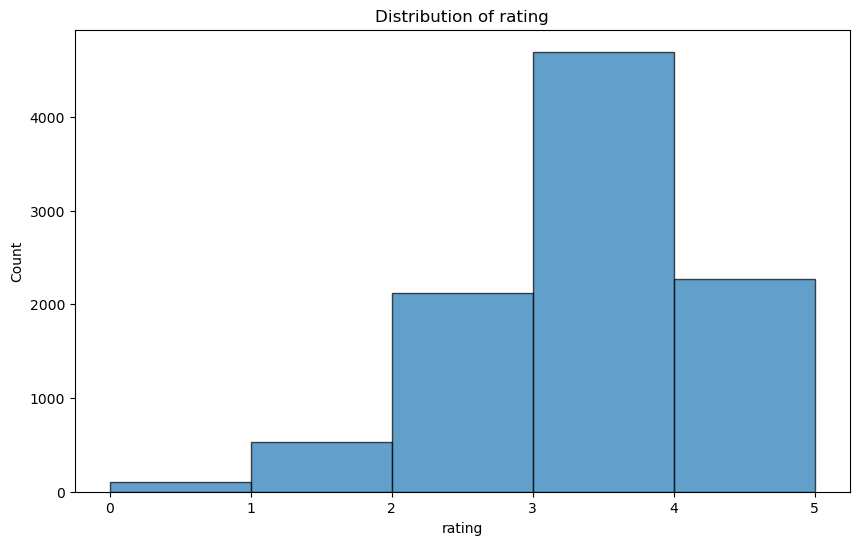

In [82]:
values, counts = zip(*mean_counts.items())
plt.figure(figsize=(10, 6))
plt.hist(values, bins=np.arange(0, 6), weights=counts, edgecolor='black', alpha=0.7)
plt.title("Distribution of rating")
plt.xlabel("rating")
plt.ylabel("Count")
plt.show()

In [49]:
movies.describe()

,movieId,count,mean
count,9742.000000,9724.000000,9724.000000
mean,42200.353623,10.369807,3.262448
std,52160.494854,22.401005,0.869874
min,1.000000,1.000000,0.500000
25%,3248.250000,1.000000,2.800000
50%,7300.000000,3.000000,3.416667
75%,76232.000000,9.000000,3.911765
max,193609.000000,329.000000,5.000000


In [84]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9742 entries, 0 to 9741
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   title    9742 non-null   object 
 2   genres   9742 non-null   object 
 3   count    9724 non-null   float64
 4   mean     9724 non-null   float64
 5   tag      1572 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 532.8+ KB


In [87]:
movies[(movies['mean'] == 5.0)&(movies['tag'].notnull())]

,movieId,title,genres,count,mean,tag
2947,3951,Two Family House (2000),[Drama],1.0,5.0,[In Netflix queue]
3294,4454,More (1998),"[Animation, Drama, Sci-Fi, IMAX]",1.0,5.0,"[claymation, creativity, dystopia, free to dow..."
3320,4495,Crossing Delancey (1988),"[Comedy, Romance]",1.0,5.0,[New York]
3691,5088,"Going Places (Valseuses, Les) (1974)","[Comedy, Crime, Drama]",1.0,5.0,[irreverent]
4251,6201,Lady Jane (1986),"[Drama, Romance]",1.0,5.0,[England]
4590,6818,Come and See (Idi i smotri) (1985),"[Drama, War]",2.0,5.0,"[atmospheric, bleak, disturbing, gritty, harsh]"
4747,7071,"Woman Under the Influence, A (1974)",[Drama],1.0,5.0,[In Netflix queue]
5236,8580,Into the Woods (1991),"[Adventure, Comedy, Fantasy, Musical]",1.0,5.0,"[fairy tales, In Netflix queue]"
6051,40491,"Match Factory Girl, The (Tulitikkutehtaan tytt...","[Comedy, Drama]",1.0,5.0,[depression]
9234,152711,Who Killed Chea Vichea? (2010),[Documentary],1.0,5.0,"[Cambodia, crime, human rights, murder, proced..."


In [97]:
movies['year'] =  movies['title'].str.extract(r'\((\d{4})\)', expand=False)
movies.head(5)

,movieId,title,genres,count,mean,tag,year
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",215.0,3.920930,"[pixar, pixar, fun]",1995
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",110.0,3.431818,"[fantasy, magic board game, Robin Williams, game]",1995
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",52.0,3.259615,"[moldy, old]",1995
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",7.0,2.357143,NaN,1995
4,5,Father of the Bride Part II (1995),[Comedy],49.0,3.071429,"[pregnancy, remake]",1995


In [105]:
movies['year'] = movies['year'].fillna(0)
movies['year'] = movies['year'].astype(int)

In [106]:
movies['year'].value_counts()

2002    311
2006    295
2001    294
2007    284
2000    283
       ... 
1915      1
1921      1
1919      1
1922      1
1908      1
Name: year, Length: 107, dtype: int64

In [107]:
new = movies.groupby('year')['mean'].mean()

In [119]:
new = pd.DataFrame(new)
new.reset_index(inplace=True)
new

,year,mean
0,0,3.711538
1,1902,3.500000
2,1903,2.500000
3,1908,4.000000
4,1915,2.000000
...,...,...
102,2014,3.113464
103,2015,3.069094
104,2016,3.103748
105,2017,3.376749


In [89]:
data = movies[(movies['mean'] == 5.0)&(movies['tag'].notnull())]

In [54]:
from surprise.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [57]:
train_dataset, eval_dataset = train_test_split(movies, test_size=0.2, 
                                               random_state=31, shuffle=True)
train_dataset = Dataset.load_from_df(
    df=train_dataset[["count", "movieId", "mean"]],
    reader=Reader(rating_scale=(0, 5))
)
test_dataset = Dataset.load_from_df(
    df=eval_dataset[["count", "movieId", "mean"]],
    reader=Reader(rating_scale=(0, 5))
)

In [58]:
svd = SVD()
cross_validate(svd, train_dataset, measures=["RMSE", "MAE"], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.9407  nan     nan     nan     nan     nan     nan     
MAE (testset)     1.7436  nan     nan     nan     nan     nan     nan     
Fit time          0.16    0.17    0.17    0.18    0.13    0.16    0.02    
Test time         0.01    0.01    0.02    0.01    0.02    0.01    0.00    


{'test_rmse': array([1.94073574,        nan,        nan,        nan,        nan]),
 'test_mae': array([1.74357188,        nan,        nan,        nan,        nan]),
 'fit_time': (0.16333675384521484,
  0.16980242729187012,
  0.16857028007507324,
  0.1766829490661621,
  0.13265514373779297),
 'test_time': (0.01442575454711914,
  0.011962175369262695,
  0.015949487686157227,
  0.014948606491088867,
  0.015329122543334961)}

In [62]:
train_dataset, eval_dataset = train_test_split(rating, test_size=0.2, 
                                              random_state=31, shuffle=True)
train_dataset = Dataset.load_from_df(
    df=train_dataset[["userId", "movieId", "rating"]],
    reader=Reader(rating_scale=(0, 5))
)
test_dataset = Dataset.load_from_df(
    df=eval_dataset[["userId", "movieId", "rating"]],
    reader=Reader(rating_scale=(0, 5))
)

In [63]:
knn = KNNBasic()
cross_validate(knn, train_dataset, measures=["RMSE", "MAE"], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9629  0.9617  0.9630  0.9537  0.9525  0.9588  0.0047  
MAE (testset)     0.7419  0.7333  0.7380  0.7321  0.7301  0.7351  0.0043  
Fit time          0.20    0.22    0.24    0.22    0.20    0.22    0.02    
Test time         1.51    1.61    1.43    1.52    1.57    1.53    0.06    


{'test_rmse': array([0.96292199, 0.96173423, 0.96304578, 0.95373449, 0.95246123]),
 'test_mae': array([0.74187089, 0.73334102, 0.73803912, 0.73208867, 0.730104  ]),
 'fit_time': (0.204789400100708,
  0.22401189804077148,
  0.24445319175720215,
  0.2231433391571045,
  0.1950843334197998),
 'test_time': (1.50516676902771,
  1.6147377490997314,
  1.4339385032653809,
  1.5230762958526611,
  1.5656139850616455)}

In [64]:
knn_with_means = KNNWithMeans()
cross_validate(knn_with_means, train_dataset, measures=["RMSE", "MAE"], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9143  0.9021  0.8964  0.9021  0.9044  0.9039  0.0058  
MAE (testset)     0.6954  0.6868  0.6862  0.6909  0.6916  0.6902  0.0034  
Fit time          0.24    0.28    0.30    0.28    0.27    0.28    0.02    
Test time         1.66    1.89    1.85    1.74    1.56    1.74    0.12    


{'test_rmse': array([0.91433487, 0.90214903, 0.8964487 , 0.90214716, 0.9044427 ]),
 'test_mae': array([0.69544861, 0.68678551, 0.68617775, 0.69086835, 0.6916055 ]),
 'fit_time': (0.2447657585144043,
  0.2799263000488281,
  0.30221009254455566,
  0.28249120712280273,
  0.2683906555175781),
 'test_time': (1.661555528640747,
  1.8940563201904297,
  1.8491296768188477,
  1.7369742393493652,
  1.564394474029541)}